<a href="https://colab.research.google.com/github/GeoEngnn/data_sci/blob/main/Stock_pd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stock Market Prediction and Forecasting using Stacked LSTM**

***Data Collection***

In [1]:
import pandas as pd

In [2]:
df =pd.read_csv('/content/AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [6]:
df1 = df.reset_index()['close']

*Assigning the close coloumn values to the data_frame 1*

In [7]:
df1.shape

(1258,)

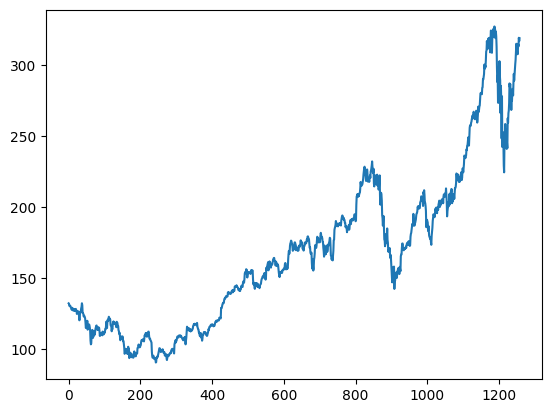

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
## LSTM are sensitive are very sensitive to the scale of the data ,so wea apply the MinMax scaler

In [10]:
import numpy as np

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1.shape

(1258, 1)

**Preprocessing**

In [13]:
# Splitting the datset
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data,test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]

In [14]:
train_size ,test_size

(817, 441)

In [15]:
print(len(train_data))
print(len(test_data))

817
441


*dataset* = *[[10],
            [11],
            [12],
            [13],
            [14],
            [15],
            [16]]*

*Iteration 1 (i = 0):*

*time_step here be 3*

*a = dataset[0:3, 0] = [10, 11, 12]*

*dataX.append([10, 11, 12])*

*dataY.append(dataset[3,0]) = 13*

**That function is basically converting your sequential stock price data into a supervised learning dataset (series format)**

In [16]:
 # convert an array of values into dataset matrix
def create_dataset(dataset,time_step=1):
  import numpy as np # Import numpy inside the function
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0]) # i+1 pushes the next item to be Y
  return np.array(dataX),np.array(dataY) # Use np instead of numpy

In [17]:
# reshape into  X=t ,t+1 ,t+2 ,t+3 and Y=t+4
time_step = 100
X_train,Y_train = create_dataset(train_data,time_step)
X_test,Y_test = create_dataset(test_data,time_step)


In [18]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [19]:
print(X_test.shape) ,print(Y_test.shape)

(340, 100)
(340,)


(None, None)

In [20]:
print(X_train.shape) ,print(Y_train.shape)

(716, 100)
(716,)


(None, None)

**Creating Stacked LSTM model**

In [103]:
# reshape input to be [samples, time steps,features] which is required for LSTM
# We need to convert (716, 100) into 3d array to be processed by LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1) # So it becomes like (716, 100,1)
# X_train.shape[1],1) i.e (100,1) becomes input for LSTM
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [104]:
## Create a stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [109]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1),dropout=0.2, recurrent_dropout=0.3)) #i.e (100,1) becomes input for LSTM as mentioned above
model.add(LSTM(50,return_sequences=True,dropout=0.2, recurrent_dropout=0.3)) # layers of LSTM --->Stacked LSTM
model.add(LSTM(50,return_sequences=False,dropout=0.2, recurrent_dropout=0.3))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer='adam')

In [110]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_49 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_50 (LSTM)                  │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_51 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [112]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=100,
    batch_size=64,
    verbose=1,
    callbacks=[early_stop]  # ✅ This is crucial!
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 450ms/step - loss: 0.0318 - val_loss: 0.1098
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 530ms/step - loss: 0.0120 - val_loss: 0.0572
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 516ms/step - loss: 0.0089 - val_loss: 0.0563
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 530ms/step - loss: 0.0100 - val_loss: 0.0554
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step - loss: 0.0094 - val_loss: 0.0404
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - loss: 0.0109 - val_loss: 0.0480
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 479ms/step - loss: 0.0092 - val_loss: 0.0279
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - loss: 0.0082 - val_loss: 0.0341
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 448ms/step - loss: 0.0091 - val_loss: 0.0292
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 363ms/step - loss: 0.0089 - val_loss: 0.0251
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 525ms/step - loss: 0.0083 - val_loss: 0.0128
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 

In [113]:
import tensorflow as tf

In [114]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [115]:
### Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [116]:
## Transform back to original form
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))

In [117]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict.reshape(-1,)))

140.38320839955887

In [118]:
## Test data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

217.8266921416361

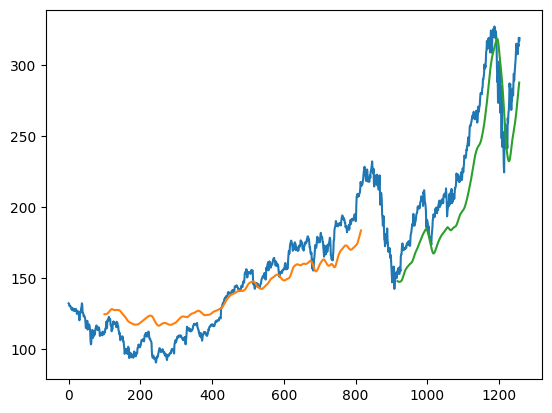

In [119]:
## Plotting
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [120]:
len(test_data)

441

In [121]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [122]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [123]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [127]:
# demonstrate prediction for next 30 days
from numpy import array

lst_outputs=[]
n_steps = 100
x_input = test_data[341:].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

for i in range(30):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_outputs.extend(yhat.tolist())
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_outputs.extend(yhat.tolist())

print(lst_outputs)

[0.85326445]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

In [129]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [130]:
import matplotlib.pyplot as plt

In [131]:
len(df1)

1258

In [132]:
df3=df1.tolist()
df3.extend(lst_outputs)

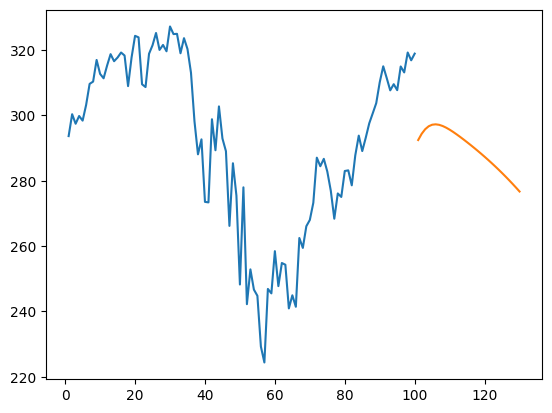

In [133]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_outputs))

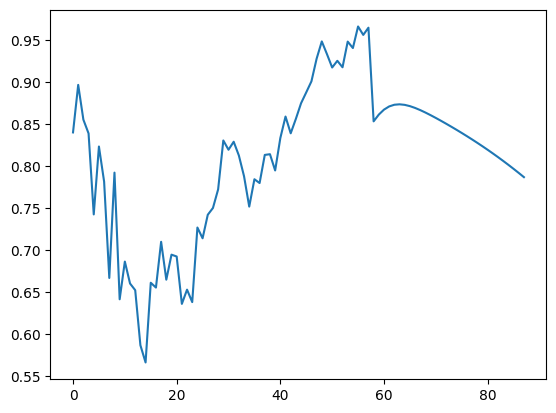

In [135]:
df3=df1.tolist()
df3.extend(lst_outputs)
plt.plot(df3[1200:])

In [136]:
model.save("stock_lstm_model.h5")

In [140]:
!pip install streamlit pyngrok


In [141]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load trained model
model = load_model("stock_lstm_model.h5")

st.title("📈 Stock Price Prediction using Stacked LSTM")
st.write("This app predicts future stock prices based on past 100 days of data.")

# Upload CSV
uploaded_file = st.file_uploader("Upload Stock Price CSV (with 'Close' column)", type=["csv"])

if uploaded_file is not None:
    data = pd.read_csv(uploaded_file)
    st.subheader("📊 Uploaded Stock Data")
    st.line_chart(data['Close'])

    # Preprocess
    close_data = data['Close'].values.reshape(-1,1)
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(close_data)

    # Prepare input (last 100 days)
    time_steps = 100
    last_100 = scaled_data[-time_steps:]
    X_input = np.array([last_100])

    # Predict next price
    prediction = model.predict(X_input)
    prediction = scaler.inverse_transform(prediction)

    st.subheader("🔮 Predicted Next Closing Price")
    st.write(f"${prediction[0][0]:.2f}")

    # Show forecast trend (optional: multiple steps)
    future_pred = []
    current_input = last_100
    for _ in range(10):  # predict next 10 days
        pred = model.predict(np.array([current_input]))
        future_pred.append(pred[0,0])
        current_input = np.append(current_input[1:], pred, axis=0)

    future_pred = scaler.inverse_transform(np.array(future_pred).reshape(-1,1))

    st.subheader("📉 Next 10-Day Forecast")
    st.line_chart(future_pred)


Writing app.py


In [143]:
from pyngrok import ngrok, conf

# Set your authtoken (only once per runtime)
ngrok.set_auth_token("33KGu5vWpdgZ9vA1gKN9qeQT1Vn_dAYACajqk7eukG6iJKCp")

# Now run your app
!streamlit run app.py &>/dev/null&

# Create public URL
public_url = ngrok.connect(8501)
print("Access your Stock Prediction app here:", public_url)


Access your Stock Prediction app here: NgrokTunnel: "https://liz-phasic-overpessimistically.ngrok-free.dev" -> "http://localhost:8501"
